What are the peculiar velocities of the Fuji TF galaxies?

In [1]:
import numpy as np

from astropy.table import Table
import astropy.units as u
import astropy.constants as const

import pickle

import matplotlib.pyplot as plt

In [2]:
h = 1
H0 = 100*h

c = const.c.to('km/s')

# Data

SGA catalog with computed peculiar velocities

In [3]:
SGA_TF = Table.read('SGA_fuji_jointTFR-varyV0-perpdwarf_moduli_pec-Watkins15.fits')
SGA_TF[:5]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,Z_DESI,ZERR_DESI,V_0p33R26,V_0p33R26_err,TARGETID,PHOTSYS,R_MAG_SB26_CORR,R_MAG_SB26_ERR_CORR,R_ABSMAG_SB26,R_ABSMAG_SB26_err,R_ABSMAG_SB26_CORR,R_ABSMAG_SB26_CORR_err,R_ABSMAG_SB26_TFbright,R_ABSMAG_SB26_TFbright_err,mu_TFbright,mu_TFbright_err,V_PEC,VERR_PEC
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float64,float64,float64,float64,int64,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
896,SGA-2020 896,PGC1190469,1190469,180.38184750000002,1.2958311000000002,Sc,76.42,0.44771332,0.7726806,0.022478215,23.47448,16.591,False,LEDA-20181114,256,PGC1190469,1,True,180.38184750000002,1.2958311000000002,0.44771332,1803p012,180.38182702766252,1.2958268307578154,0.6239483,SB26,76.93204,0.79918337,180.38178401011206,1.295990493861164,16.25661,7.6343946,7.3312407,7.215459,4.267071,6.71145,8.98399,11.085844,12.783826,14.283976,15.799797,17.191736,18.718449,18.022089,17.380363,16.982048,17.370085,16.760023,16.377943,16.967363,16.3918,16.024693,16.728146,16.17214,15.817478,16.609686,16.06539,15.715597,16.54587,16.008068,15.658699,16.505327,15.967604,15.619181,16.48057,15.942226,15.594475,16.459711,15.924162,15.572447,0.02403138,0.037713606,0.06752815,0.0597593,0.041663416,0.057950046,0.06897008,0.07238169,0.11818266,0.0070740557,0.008179923,0.008415725,0.005835994,0.006626628,0.0068130954,0.0056522293,0.006152283,0.0062183426,0.0057331356,0.0059468574,0.0059097866,0.005547482,0.0057424223,0.005712396,0.005370375,0.0055686547,0.005550764,0.0052407323,0.0054267743,0.00542918

Peculiar velocities from FP

In [4]:
FP = Table.read('../../SV/DESI_FP_logdists_fiducial.csv', format='ascii.commented_header')
FP[:5]

fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,z_x,zerr,zwarn,spectype,subtype,deltachi2,healpix_id,targetid.2,target_ra,target_dec,obsconditions,release,brickid_1,brick_objid,fiberflux_ivar_g,fiberflux_ivar_r,fiberflux_ivar_z,morphtype,flux_g,flux_r,flux_z,flux_ivar_g,flux_ivar_r,flux_ivar_z,ebv,flux_w1,flux_w2,flux_ivar_w1,flux_ivar_w2,fiberflux_g,fiberflux_r,fiberflux_z,fibertotflux_g,fibertotflux_r,fibertotflux_z,sersic_1,coadd_numexp,coadd_exptime,coadd_numnight,coadd_numtile,healpix_id.1,objid_1,brickid.1,brickname_1,ra.1,dec.1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,OBJID_2,BRICKID_2,BRICKNAME_2,RA_2,DEC_2,TYPE,SERSIC_2,Z_PHOT_MEDIAN,Z_PHOT_L95,mag_g,mag_r,mag_z,mag_B,mag_g_err,mag_r_err,mag_z_err,fibre_mag_g,fibre_mag_r,fibre_mag_z,uncor_radius,BA_ratio,circ_radius,uncor_radius_err,err_shape_e1,err_shape_e2,pos_angle,Separation,mag_r_corrected,BA_ratio_error,TargetId,tmass,flag,z_y,rmag,g_r_PS1_5_cor,W2_W3,W2_W3_err,PS1_ibumpy,zcmb,zcmb_group,dz,dz_group,r,er,kcor_r,kcor_g,i,ei,s,es,absmag_r,Sn,logdist,logdist_err,logdist_alpha,pv,pverr
int64,int64,float64,float64,int64,int64,int64,str3,str6,int64,float64,float64,int64,str6,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,str5,int64,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,str8,float64,float64,float64,float64,float64,float64,int64,int64,str8,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str22,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39628417112478213,400,192.260476663904,26.8931119632851,39628417112478213,1301,28148,sv1,bright,39628417112478213,0.0246198717561043,3.05679754892841e-06,0,GALAXY,--,208858.610858595,1301,39628417112478213,192.260476663904,26.8931119632851,4,9010,481140,4613,False,--,--,SER,718.737670898438,1493.39233398438,2632.02905273438,12.3129425048828,3.62823224067688,2.14227867126465,0.0110182352364063,1792.16967773438,1005.01934814453,-1.0,-1.0,84.9578857421875,176.525405883789,311.1171875,84.9578857421875,176.525405883789,311.1171875,3.24683547019958,15,6695.12646484375,7,1,1301,4613,481140,1921p270,192.260476663904,26.8931119632851,138.97191401554343,1.3838325204676758,50.32823792570804,37.09863394208711,4613,481140,1921p270,192.26047666390429,26.89311196328508,SER,3.2468355,0.023591544,0.018623924,15.323162,14.54071,13.93593,15.744,0.00041668504,0.00037338858,0.00027839307,17.641579,16.859127,16.254347,5.18443,0.3502856,3.068401,0.001138905,0.00015687887,0.00016151024,-22.695267,9.032862052074111e-10,14.54071,0.0001115389190186,39628417112478213,2MASXJ12490248+2653350,1,0.0246,14.367,0.643,0.902,0.145,0.216,0.02556977744883837,0.02556977744883837,76.1982724818877,76.1982724818877,0.04386937487526493,0.00011782648155669783,0.02503684213839932,0.04334819959542904,2.9441341941217747,0.0002789970682498833,2.154576602686897,0.004324548825517668,-19.92513203057605,1.0,0.04082911658524023,0.10087512604970075,-0.21153047623097235,716.01186967735,1769.0264607119864
39628417133447721,426,193.57922538261,27.0680307191934,39628417133447721,1304,28149,sv1,bright,39628417133447721,0.0278119786253126,2.6882528734125e-06,0,GALAXY,--,648939.39017427,1304,39628417133447721,193.57922538261,27.0680307191934,4,9010,481145,2601,--,--,--,SER,5968.87890625,12903.7099609375,23318.6015625,1.23958659172058,0.327169686555862,0.208652123808861,0.008288275450468,16008.04296875,9302.5791015625,-1.0,-1.0,225.581344604492,487.668823242188,881.277954101562,225.581451416016,487.669097900391,881.278625488281,4.501549243927,15,6695.12646484375,

# Identify "dwarf" galaxies

In [5]:
temp_infile = open('cov_ab_fuji_joint_TFR_varyV0-perpdwarfs0_KAD.pickle', 'rb')
cov_ab, tfr_samples, V0 = pickle.load(temp_infile)
temp_infile.close()

In [6]:
slope = np.median(tfr_samples[0])
slope_err = np.sqrt(cov_ab[0,0])

ZP = np.median(tfr_samples[2])
ZP_err = np.sqrt(cov_ab[2,2])

In [9]:
logV_n17 = (-17 - ZP)/slope + V0
b_perp = -17 + (1/slope)*(logV_n17 - V0)

dwarf_boolean = (SGA_TF['R_ABSMAG_SB26_CORR'] - SGA_TF['R_ABSMAG_SB26_CORR_err']) > (-(np.log10(SGA_TF['V_0p33R26']) - V0)/slope + b_perp)

In [10]:
print('SGA galaxies with distance moduli:', len(SGA_TF))
print('non-"dwarf" SGA galaxies with distance moduli:', len(SGA_TF) - sum(dwarf_boolean))

SGA galaxies with distance moduli: 1164
non-"dwarf" SGA galaxies with distance moduli: 1134


# Plots

In [38]:
bin_width = 1500 # km/s
v_min = -41000
v_max = -v_min

v_bins = np.arange(v_min, v_max, bin_width)
vnorm_bins = np.arange(-20, 20, 1)

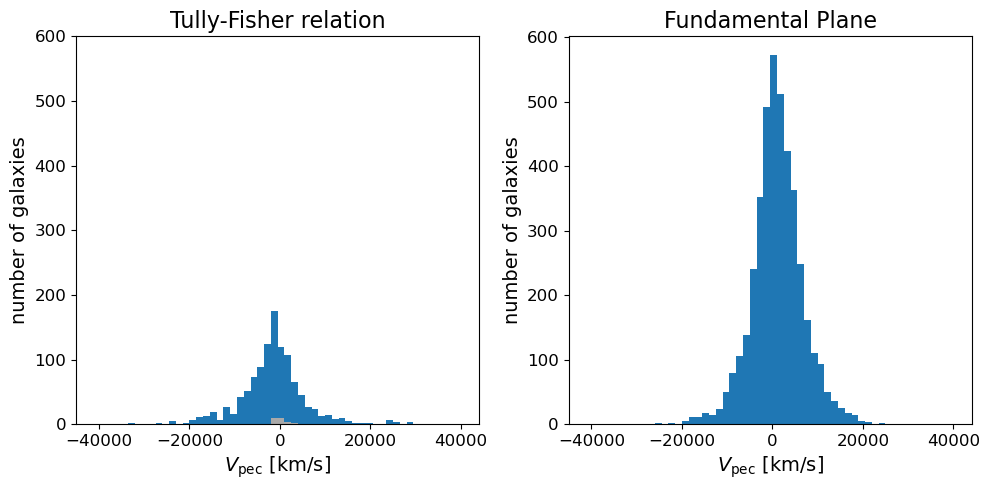

In [12]:
plt.figure(figsize=(10,5), tight_layout=True)

plt.subplot(121)
plt.title('Tully-Fisher relation', fontsize=16)
plt.hist(SGA_TF['V_PEC'][~dwarf_boolean], bins=v_bins)
plt.hist(SGA_TF['V_PEC'][dwarf_boolean], bins=v_bins, color='darkgray')
plt.ylim(ymax=600)
plt.xlabel(r'$V_\text{pec}$ [km/s]', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(122)
plt.title('Fundamental Plane', fontsize=16)
plt.hist(FP['pv'], bins=vnorm_bins)
plt.xlabel(r'$V_\text{pec}$ [km/s]', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12);

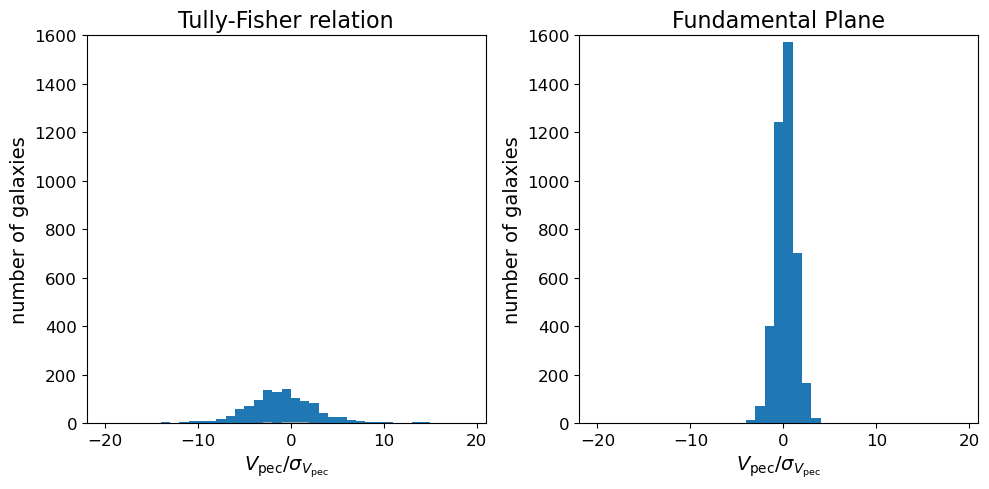

In [41]:
plt.figure(figsize=(10,5), tight_layout=True)

plt.subplot(121)
plt.title('Tully-Fisher relation', fontsize=16)
plt.hist(SGA_TF['V_PEC'][~dwarf_boolean]/SGA_TF['VERR_PEC'][~dwarf_boolean], bins=vnorm_bins)
plt.hist(SGA_TF['V_PEC'][dwarf_boolean]/SGA_TF['VERR_PEC'][dwarf_boolean], bins=vnorm_bins, color='darkgray')
plt.ylim(ymax=1600)
plt.xlabel(r'$V_\text{pec} / \sigma_{V_\text{pec}}$', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(122)
plt.title('Fundamental Plane', fontsize=16)
plt.hist(FP['pv']/FP['pverr'], bins=vnorm_bins)
plt.ylim(ymax=1600)
plt.xlabel(r'$V_\text{pec} / \sigma_{V_\text{pec}}$', fontsize=14)
plt.ylabel('number of galaxies', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12);

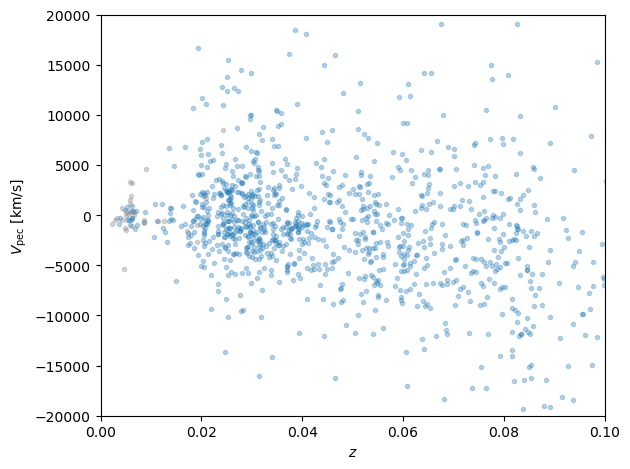

In [19]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['Z_DESI'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean], '.', alpha=0.3)
plt.plot(SGA_TF['Z_DESI'][dwarf_boolean], SGA_TF['V_PEC'][dwarf_boolean], '.', c='gray', alpha=0.3)

plt.xlim([0, 0.1])
plt.ylim([-20000, 20000])

plt.xlabel('$z$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

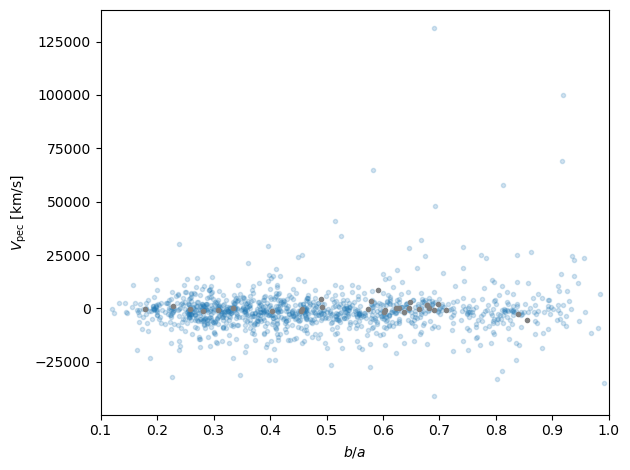

In [51]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['BA'][~dwarf_boolean], SGA_TF['V_PEC'][~dwarf_boolean], '.', alpha=0.2)
plt.plot(SGA_TF['BA'][dwarf_boolean], SGA_TF['V_PEC'][dwarf_boolean], '.', c='gray')

plt.xlim([0.1, 1])
# plt.ylim([-20000, 20000])

plt.xlabel('$b/a$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

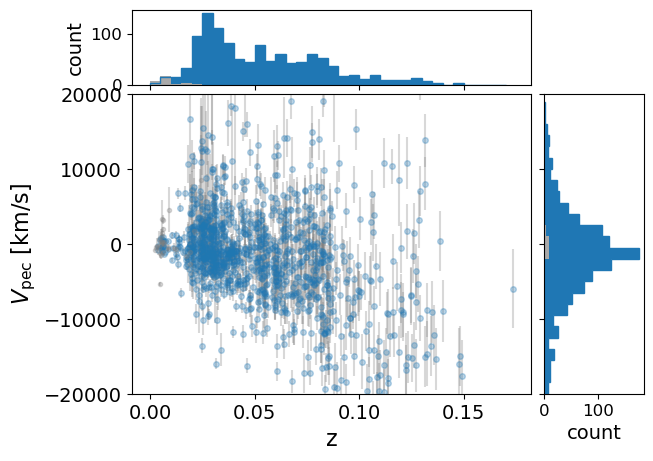

In [59]:
fig = plt.figure()

gs = fig.add_gridspec(2, 2, width_ratios=(4,1), height_ratios=(1,4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax.errorbar(SGA_TF['Z_DESI'][~dwarf_boolean], 
            SGA_TF['V_PEC'][~dwarf_boolean], 
            xerr=SGA_TF['ZERR_DESI'][~dwarf_boolean], 
            yerr=SGA_TF['VERR_PEC'][~dwarf_boolean],
            fmt='o', 
            markersize=4, 
            alpha=0.3, 
            ecolor='gray')
ax.errorbar(SGA_TF['Z_DESI'][dwarf_boolean], 
            SGA_TF['V_PEC'][dwarf_boolean], 
            xerr=SGA_TF['ZERR_DESI'][dwarf_boolean], 
            yerr=SGA_TF['VERR_PEC'][dwarf_boolean],
            fmt='.', 
            color='gray',
            alpha=0.3, 
            ecolor='gray')

plt.tick_params(axis='both', which='major', labelsize=14)

ax.set_xlabel('z', fontsize=16)
ax.set_ylabel(r'$V_\text{pec}$ [km/s]', fontsize=16)

ax.set_ylim((-20000, 20000))


ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
ax_histx.hist(SGA_TF['Z_DESI'][~dwarf_boolean], bins=np.arange(0, 0.175, 0.005))
ax_histx.hist(SGA_TF['Z_DESI'][dwarf_boolean], bins=np.arange(0, 0.175, 0.005), color='darkgray')
ax_histx.hist(SGA_TF['Z_DESI'][~dwarf_boolean], bins=np.arange(0, 0.175, 0.005), color='tab:blue', histtype='step')

ax_histx.tick_params(axis='x', labelbottom=False)
ax_histx.tick_params(axis='y', labelsize=12)
ax_histx.set_ylabel('count', fontsize=14)


ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
ax_histy.hist(SGA_TF['V_PEC'][~dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              orientation='horizontal')
ax_histy.hist(SGA_TF['V_PEC'][dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              color='darkgray', 
              orientation='horizontal')
ax_histy.hist(SGA_TF['V_PEC'][~dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              orientation='horizontal', 
              histtype='step', 
              color='tab:blue')

# ax_histy.set_xscale('log')
ax_histy.tick_params(axis='y', labelleft=False)
ax_histy.tick_params(axis='x', labelsize=12)
ax_histy.set_xlabel('count', fontsize=14);

plt.savefig('../../Figures/SV/fuji_Vpec-v-z_jointTFR-varyV0-perpdwarfs_20241213.png', 
            dpi=150, 
            facecolor='none', 
            bbox_inches='tight');

In [ ]:
fig = plt.figure()

gs = fig.add_gridspec(2, 2, width_ratios=(4,1), height_ratios=(1,4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1,0])
ax.errorbar(SGA_TF['Z_DESI'][~dwarf_boolean], 
            SGA_TF['V_PEC'][~dwarf_boolean]/SGA_TF['VERR_PEC'][~dwarf_boolean], 
            xerr=SGA_TF['ZERR_DESI'][~dwarf_boolean], 
            # yerr=SGA_TF['VERR_PEC'][~dwarf_boolean],
            fmt='o', 
            markersize=4, 
            alpha=0.3, 
            ecolor='gray')
ax.errorbar(SGA_TF['Z_DESI'][dwarf_boolean], 
            SGA_TF['V_PEC'][dwarf_boolean]/SGA_TF['VERR_PEC'][dwarf_boolean], 
            xerr=SGA_TF['ZERR_DESI'][dwarf_boolean], 
            # yerr=SGA_TF['VERR_PEC'][dwarf_boolean],
            fmt='.', 
            color='gray',
            alpha=0.3, 
            ecolor='gray')

plt.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel('z', fontsize=14)
ax.set_ylabel(r'$V_\text{pec}$ [km/s]', fontsize=14)

# ax.set_ylim((-20000, 20000))


ax_histx = fig.add_subplot(gs[0,0], sharex=ax)
ax_histx.hist(SGA_TF['Z_DESI'][~dwarf_boolean], bins=np.arange(0, 0.175, 0.005))
ax_histx.hist(SGA_TF['Z_DESI'][dwarf_boolean], bins=np.arange(0, 0.175, 0.005), color='darkgray')
ax_histx.hist(SGA_TF['Z_DESI'][~dwarf_boolean], bins=np.arange(0, 0.175, 0.005), color='tab:blue', histtype='step')

ax_histx.tick_params(axis='x', labelbottom=False)
ax_histx.set_ylabel('count')


ax_histy = fig.add_subplot(gs[1,1], sharey=ax)
ax_histy.hist(SGA_TF['V_PEC'][~dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              orientation='horizontal')
ax_histy.hist(SGA_TF['V_PEC'][dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              color='darkgray', 
              orientation='horizontal')
ax_histy.hist(SGA_TF['V_PEC'][~dwarf_boolean], 
              bins=np.arange(-20000, 20000, bin_width), 
              orientation='horizontal', 
              histtype='step', 
              color='tab:blue')

# ax_histy.set_xscale('log')
ax_histy.tick_params(axis='y', labelleft=False)
ax_histy.set_xlabel('count');

# plt.savefig('../../Figures/SV/fuji_Vpec-v-z_jointTFR-varyV0-perpdwarfs_20241213.png', 
#             dpi=150, 
#             facecolor='none', 
#             bbox_inches='tight');

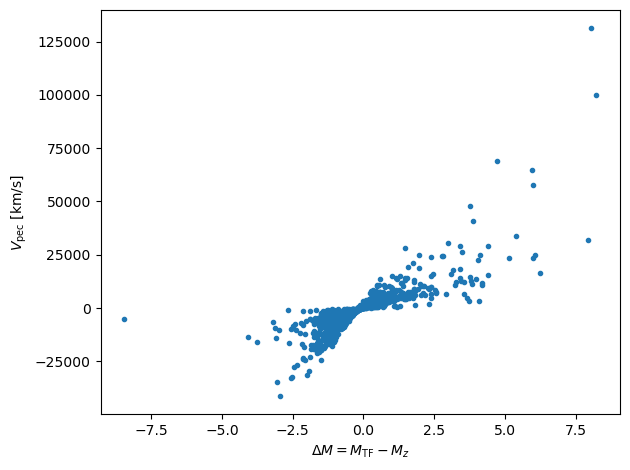

In [47]:
plt.figure(tight_layout=True)

plt.plot(SGA_TF['R_ABSMAG_SB26_TFbright'] - SGA_TF['R_ABSMAG_SB26_CORR'], 
         SGA_TF['V_PEC'], 
         '.'
        )

plt.xlabel(r'$\Delta M = M_\text{TF} - M_z$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

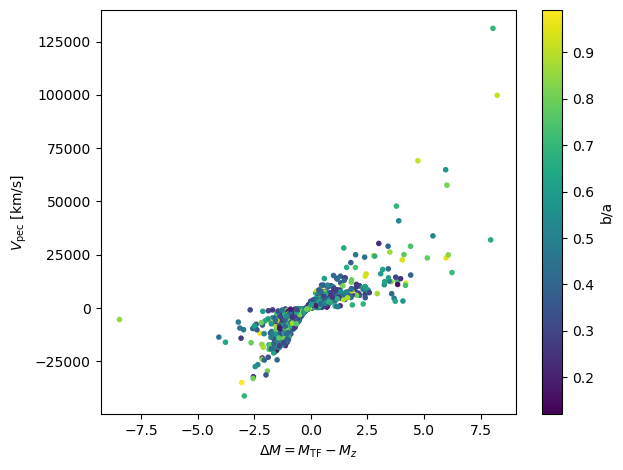

In [54]:
plt.figure(tight_layout=True)

plt.scatter(SGA_TF['R_ABSMAG_SB26_TFbright'] - SGA_TF['R_ABSMAG_SB26_CORR'], 
            SGA_TF['V_PEC'], 
            c=SGA_TF['BA'],
            marker='.', 
            # alpha=0.2
           )

plt.colorbar(label='b/a')

plt.xlabel(r'$\Delta M = M_\text{TF} - M_z$')
plt.ylabel(r'$V_\text{pec}$ [km/s]');

In [48]:
SGA_TF['SGA_ID', 'RA', 'DEC', 'V_0p33R26', 'R_ABSMAG_SB26_TFbright', 'R_ABSMAG_SB26_CORR', 'V_PEC', 'VERR_PEC'][np.abs(SGA_TF['R_ABSMAG_SB26_TFbright'] - SGA_TF['R_ABSMAG_SB26_CORR']) > 2].show_in_notebook()

idx,SGA_ID,RA,DEC,V_0p33R26,R_ABSMAG_SB26_TFbright,R_ABSMAG_SB26_CORR,V_PEC,VERR_PEC
0,1980,221.0765229904383,0.04404351172445308,265.3335545848681,-22.60622955712535,-20.128085781361037,-9418.696331983088,700.1884442369806
1,5958,215.880442955478,52.92332308171192,36.34639024582176,-15.89396136079863,-20.624352832188567,69123.15231952349,4836.789205107528
2,5964,246.57584011290885,42.33277306995234,44.65927910609046,-16.589424985934084,-19.03583083219954,15974.927603477943,1689.2966343443065
3,10553,217.65894049526668,35.4016897893184,386.6044791456857,-23.877220881983657,-21.73382923686389,-23414.603036771354,3439.6142966340017
4,50360,215.93693121400503,53.99023498062971,30.75664920065232,-15.330111619001931,-18.75391273361068,18405.30608469267,1405.309927363849
5,92954,189.86853445167645,63.37460570065662,48.17713985581944,-16.845445395383702,-20.730833782917315,40929.29863927845,2989.0925043215057
6,114405,216.79108702430176,51.32976643074304,193.774009875664,-21.544988583735723,-19.300592806037702,-11758.675902126528,811.2854171249057
7,129388,191.36956369920242,63.008901874561104,13.735752865999086,-12.608241188043142,-16.289192052324292,4578.349491772534,3050.8378286273046
8,139660,194.91584295024506,27.57659701336176,29.174205757341046,-15.151756732818622,-18.090029898262483,6803.308690100551,942.5490506346445
9,170351,234.1126015198114,43.518759421536785,97.38971518796133,-19.221999993156818,-21.39120256976059,6034.03540678122,575.8685565221738
